In [18]:
#Importare Biblioteci
import cv2 #used to load the images (in the future it will have other uses)
import numpy as np
import glob #used to read image names
import random #used to generate tran/test split
import ipyplot #it will be explained
from matplotlib import pyplot as plt #for all ur plotting needs
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import ipyplot
from sklearn.model_selection import train_test_split
import pandas as pd
import statistics 
from sklearn import preprocessing

In [8]:
#Importare poze + Atribuire etichete + Redimensionare

data_dir = './Baza de date'

categories = ['0', '1', '2', '3', '4']


def make_data():
    
    data = []
    
    for category in categories:
        path = os.path.join(data_dir, category)
        label = categories.index(category)
        
        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (200, 200)) # redimensionare
            b, g ,r = cv2.split(image)
            
            #b = np.array(b, dtype = np.float32) #img -> array
            #b = np.array(b.flatten())
            
            #g = np.array(g, dtype = np.float32) #img -> array
            #g = np.array(g.flatten())
            
            r = np.array(r, dtype = np.float32) #img -> array
            #r = np.array(r.flatten())
            
            #image = [b, g ,r]
            image = [r]
            image = np.array(image, dtype = np.float32) #img -> array
            #image = np.array(image.flatten())

            data.append([image, label])
            
    #Pt a amesteca datele       
    #np.random.shuffle(data)
    
    features = []
    labels = []
    
    for img, lbl in data:
        features.append(img)
        labels.append(lbl)
        
    features = np.array(features, dtype = np.float32)
    labels = np.array(labels, dtype = np.float32)
    
    return [features, labels]

In [9]:
#Features - Labels - etichetele pozelor

[features, labels] = make_data()



In [10]:
print(np.shape(features))
print(np.shape(labels))
print(str(labels)) 

(50, 1, 200, 200)
(50,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4.]



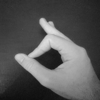


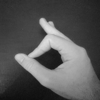


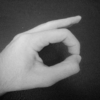


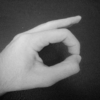


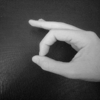


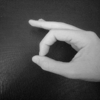


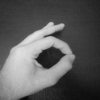


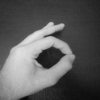


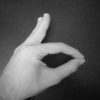


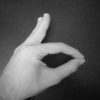


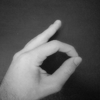


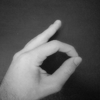


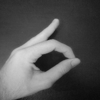


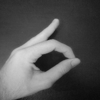


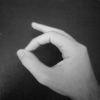


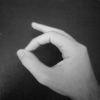


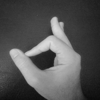


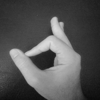


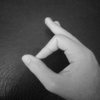


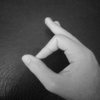


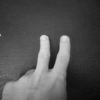


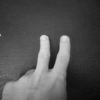


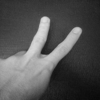


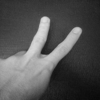


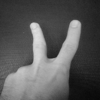


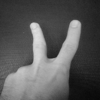


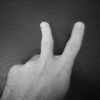


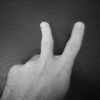


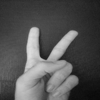


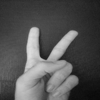


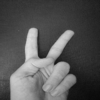


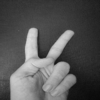


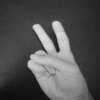


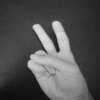


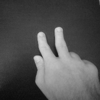


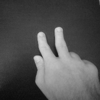


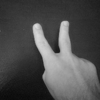


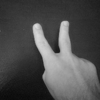


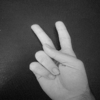


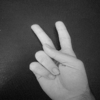


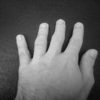


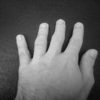


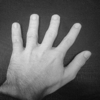


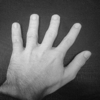


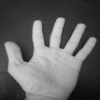


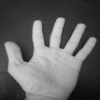


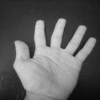


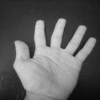


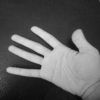


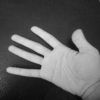


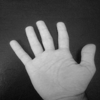


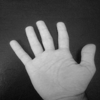


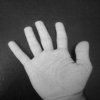


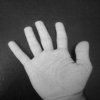


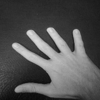


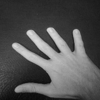


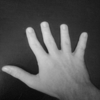


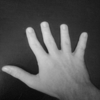


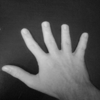


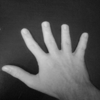


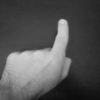


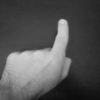


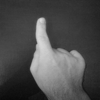


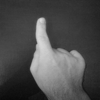


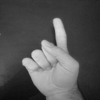


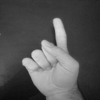


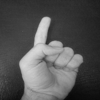


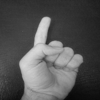


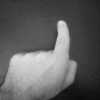


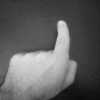


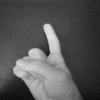


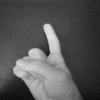


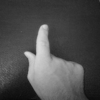


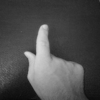


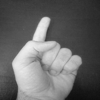


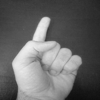


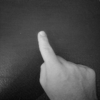


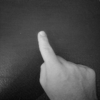


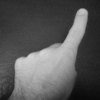


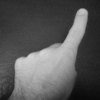


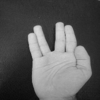


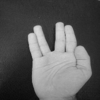


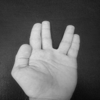


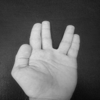


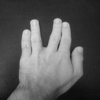


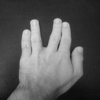


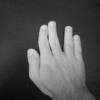


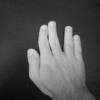


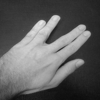


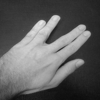


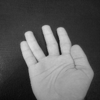


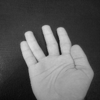


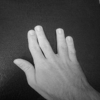


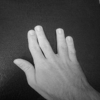


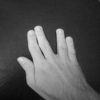


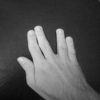


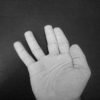


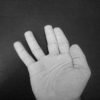


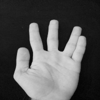


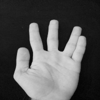

In [11]:
#Salvarea pozelor in train si test + BGR to RGB


#Verificare 
for i in  features:
    ipyplot.plot_images(i, max_images=100, img_width=100)

 


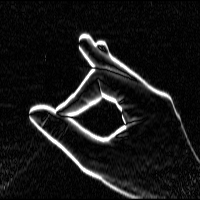


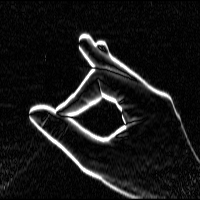


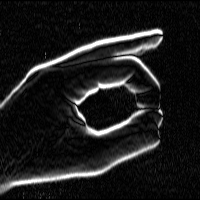


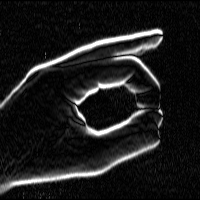


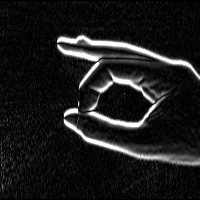


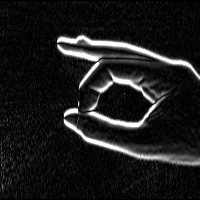


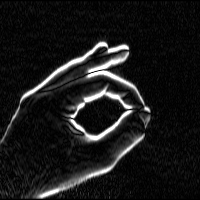


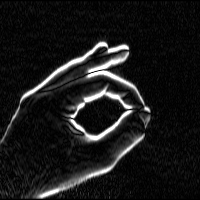


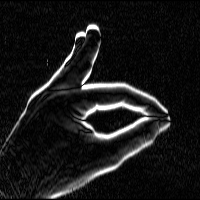


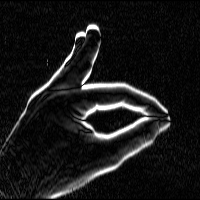


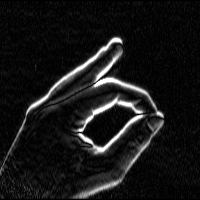


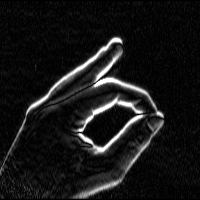


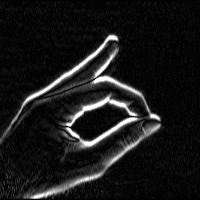


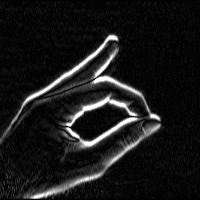


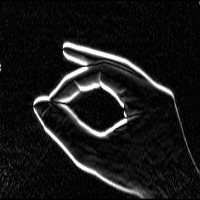


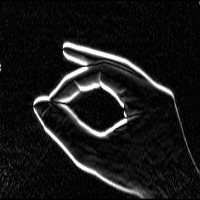


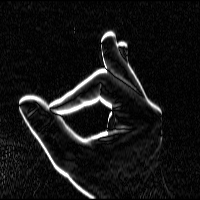


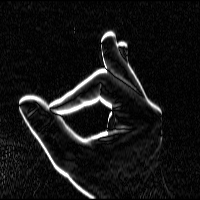


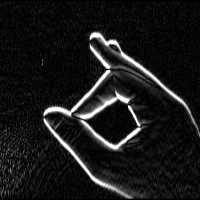


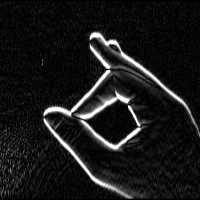


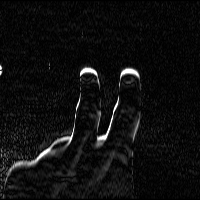


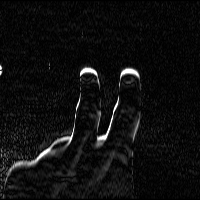


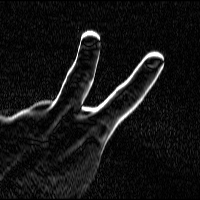


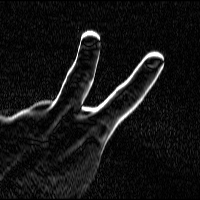


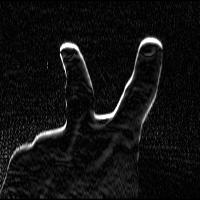


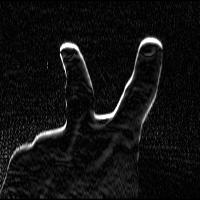


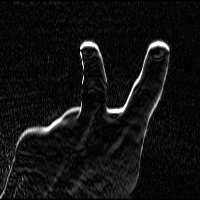


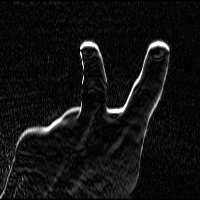


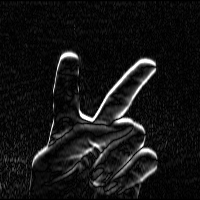


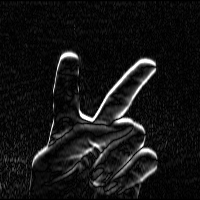


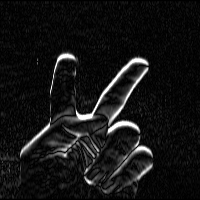


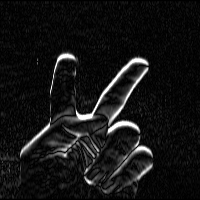


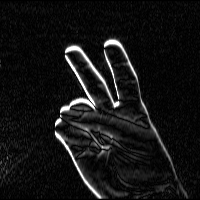


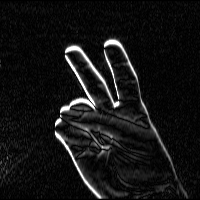


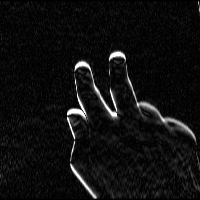


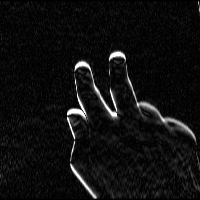


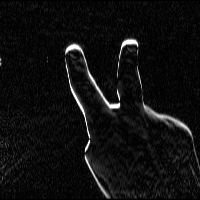


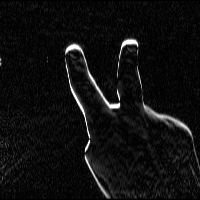


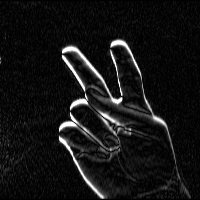


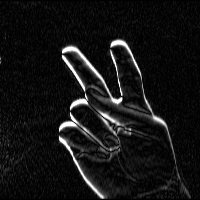


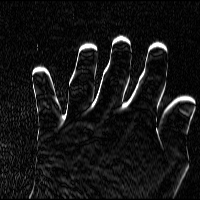


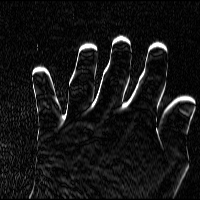


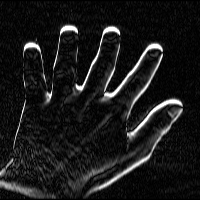


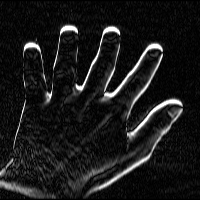


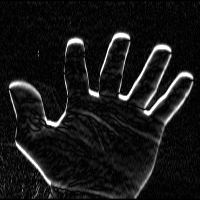


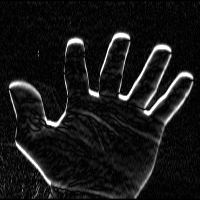


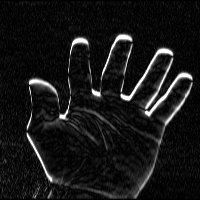


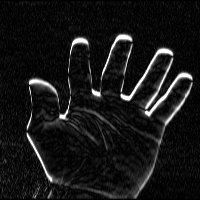


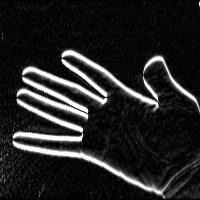


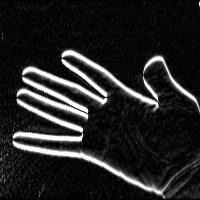


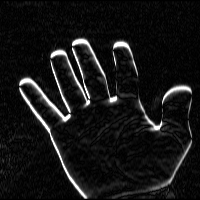


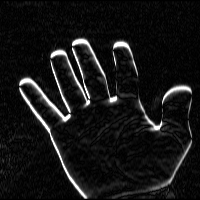


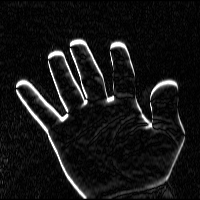


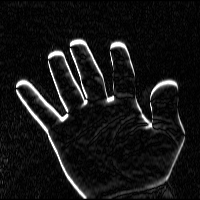


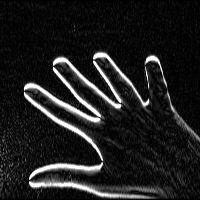


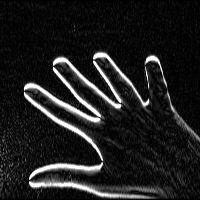


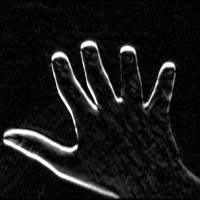


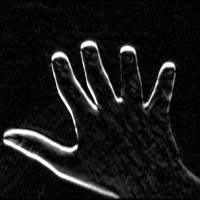


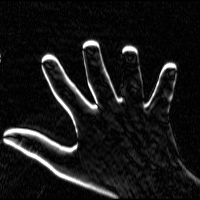


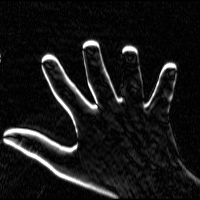


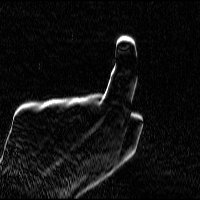


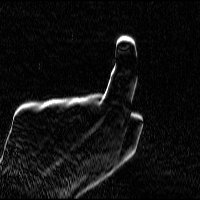


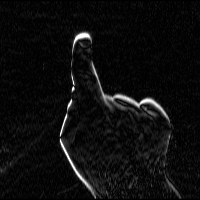


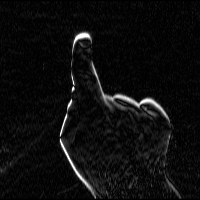


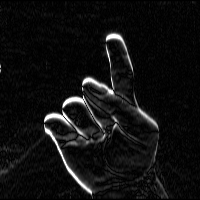


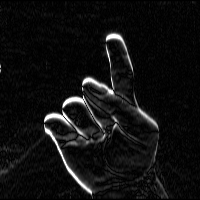


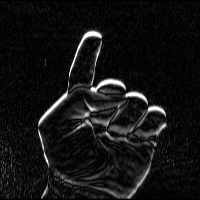


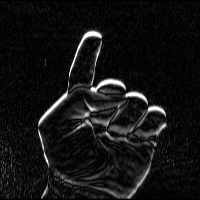


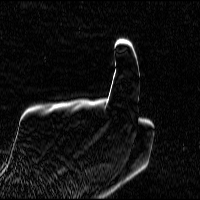


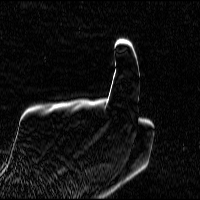


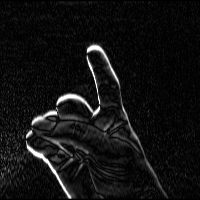


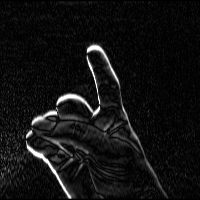


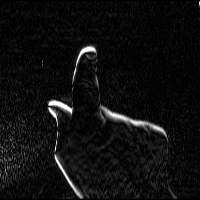


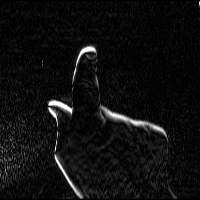


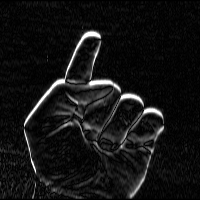


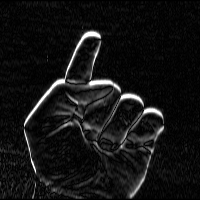


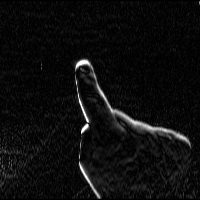


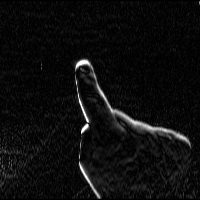


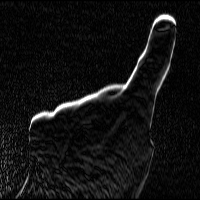


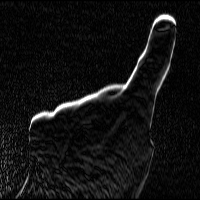


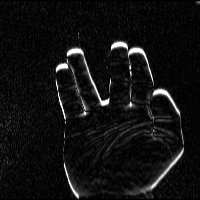


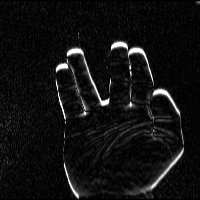


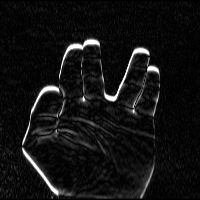


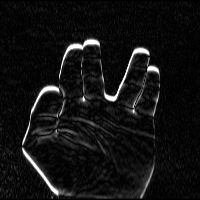


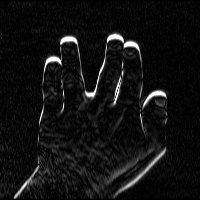


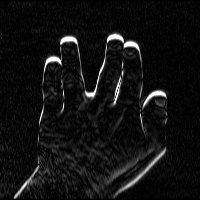


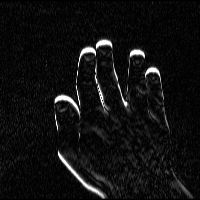


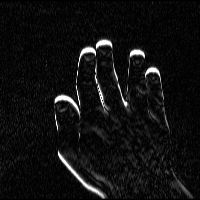


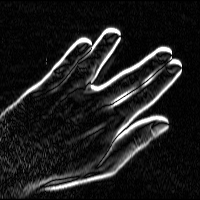


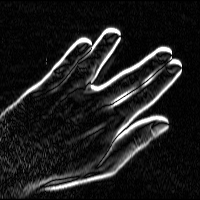


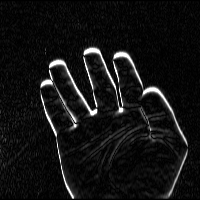


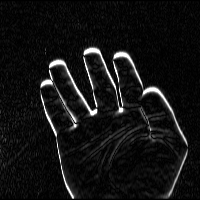


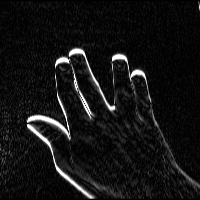


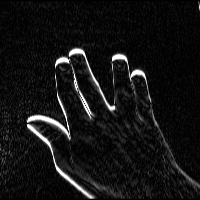


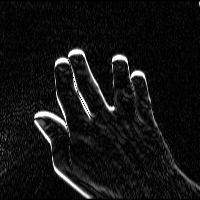


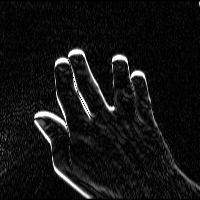


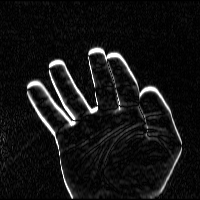


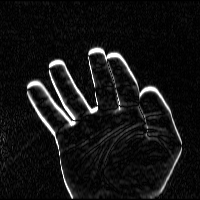


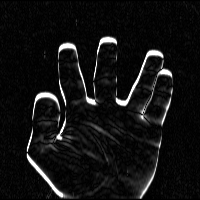


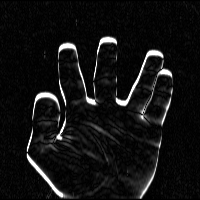

In [86]:
#Sobel

scale = 1.5
delta = 0
ddepth = cv2.CV_16S

features_sobel = []

for i in features:
    src = cv2.GaussianBlur(i, (7, 7),cv2.BORDER_CONSTANT)

    grad_x = cv2.Sobel(src, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)

    grad_y = cv2.Sobel(src, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    
    grad = cv2.addWeighted(abs_grad_x, 1, abs_grad_y, 1, 0)
    
    features_sobel.append(grad)

    
    
#Verificare 
for i in  features_sobel:
    ipyplot.plot_images(i, max_images=27, img_width=200)


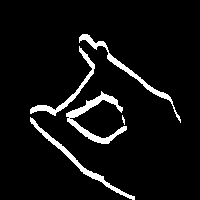


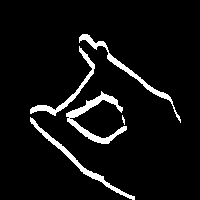


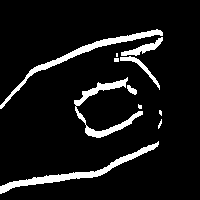


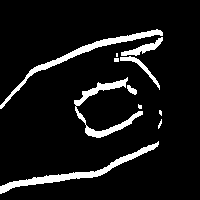


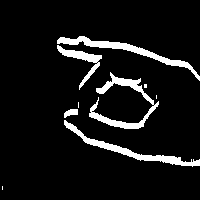


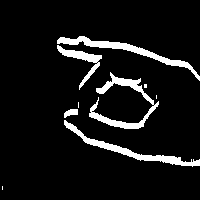


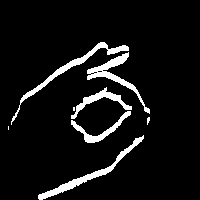


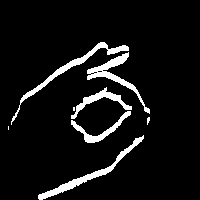


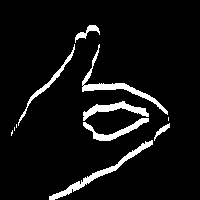


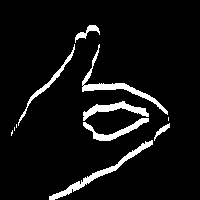


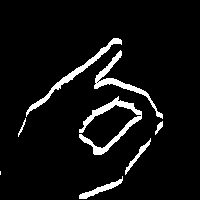


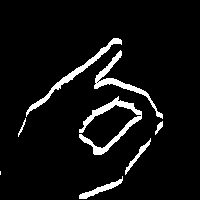


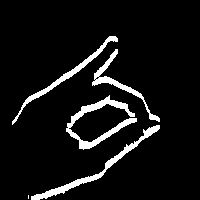


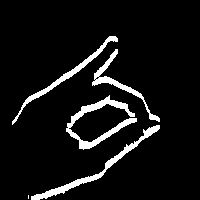


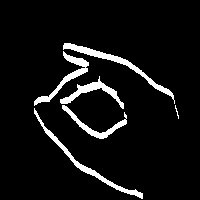


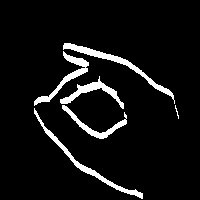


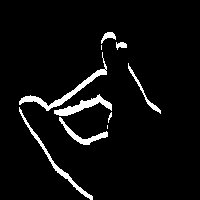


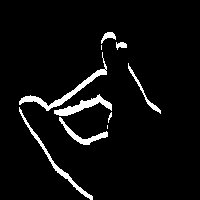


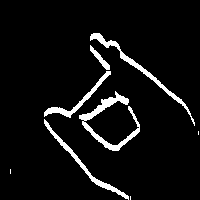


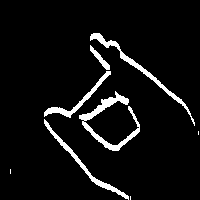


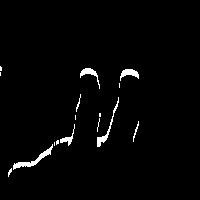


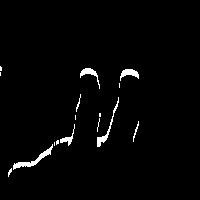


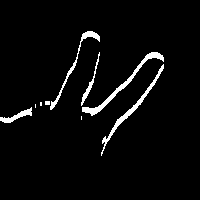


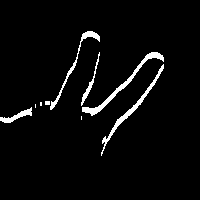


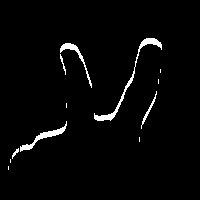


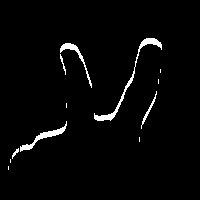


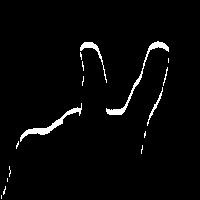


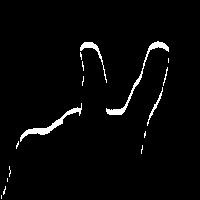


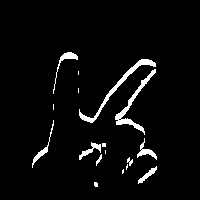


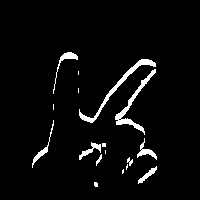


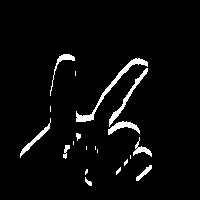


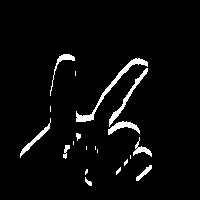


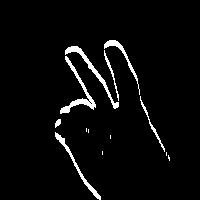


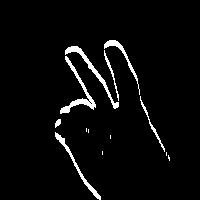


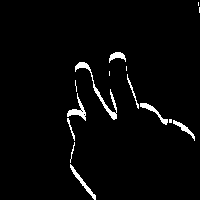


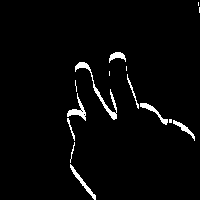


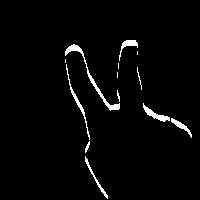


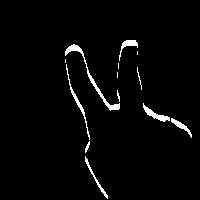


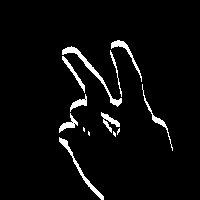


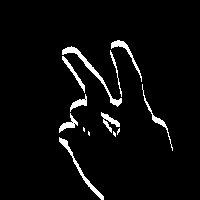


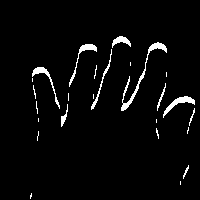


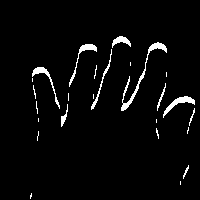


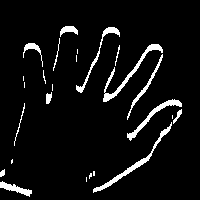


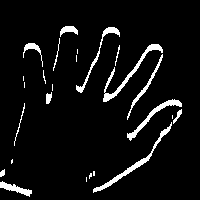


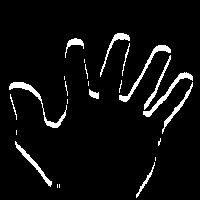


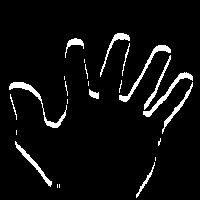


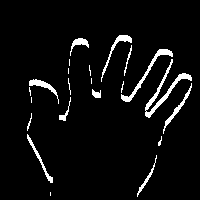


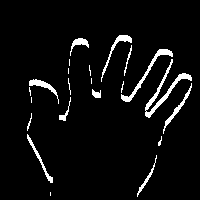


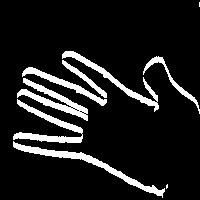


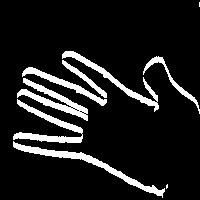


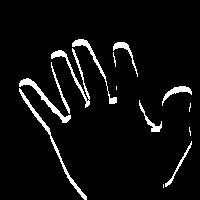


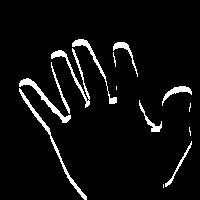


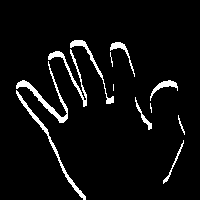


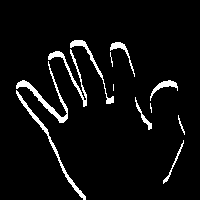


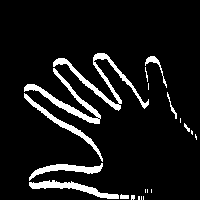


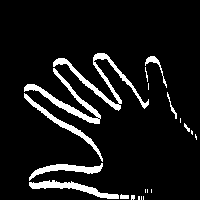


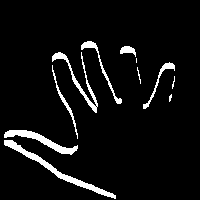


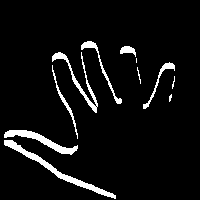


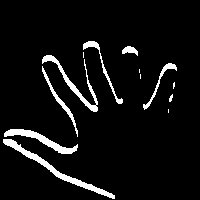


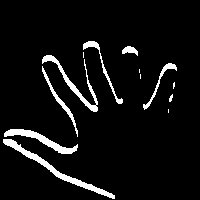


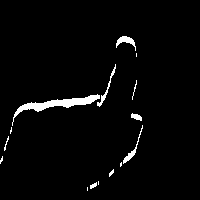


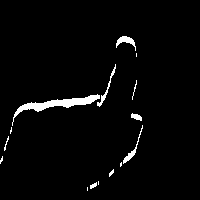


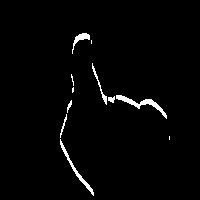


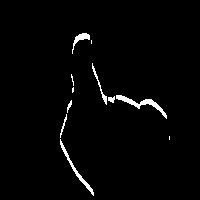


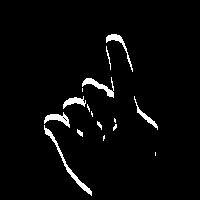


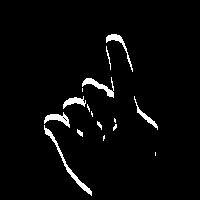


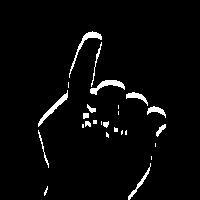


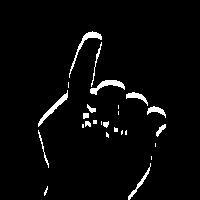


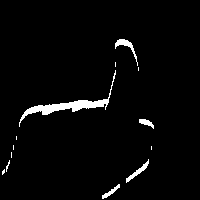


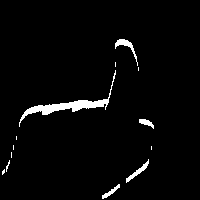


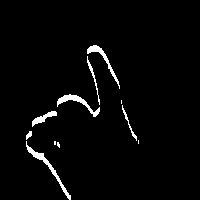


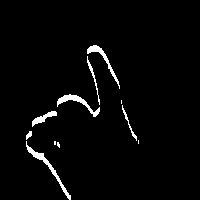


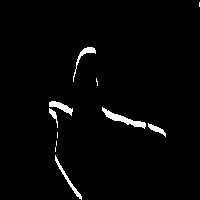


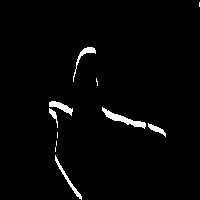


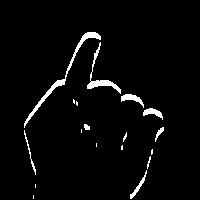


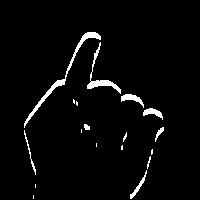


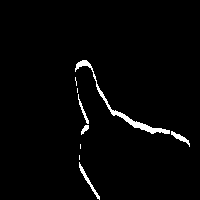


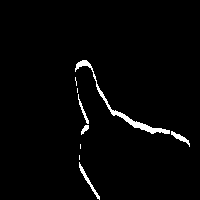


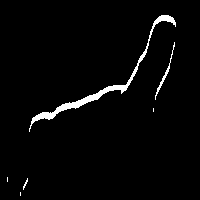


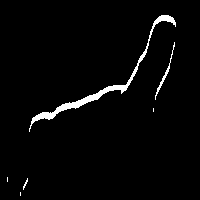


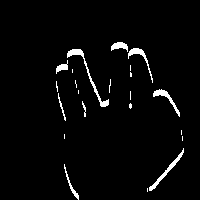


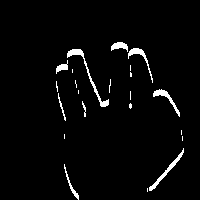


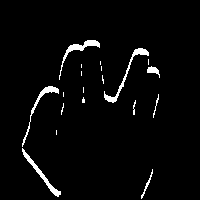


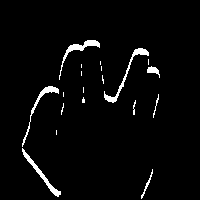


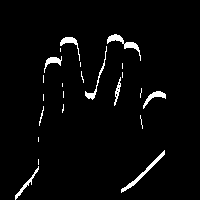


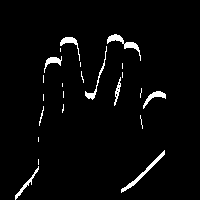


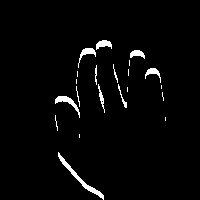


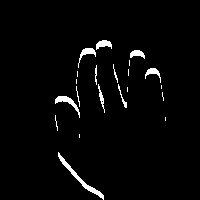


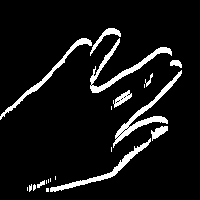


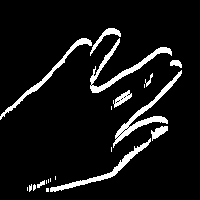


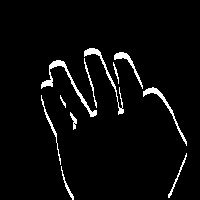


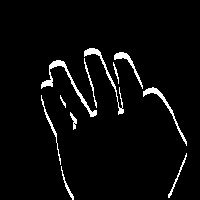


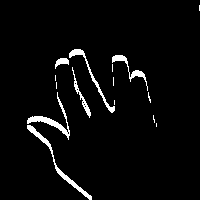


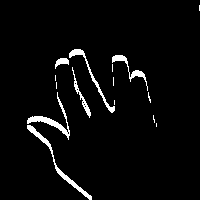


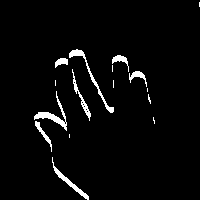


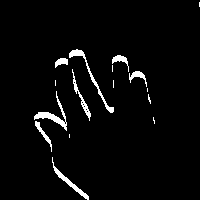


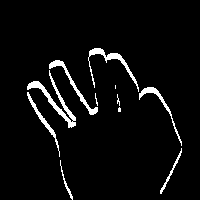


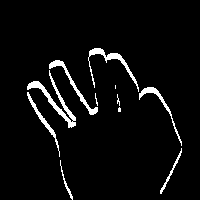


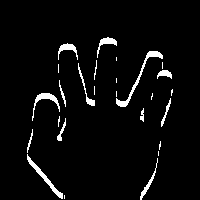


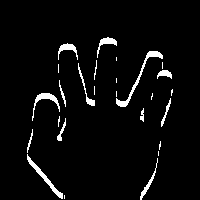

In [87]:
#Threshold + Opening

kernel = np.ones((4,4),np.float32)/25
kernel1 = np.ones((6,6),np.float32)/25
features_thresh = []


for i in features_sobel:
    ret,thresh = cv2.threshold(i,90,255,cv2.THRESH_BINARY)
    #thresh = cv2.adaptiveThreshold(i,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,6)
    thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    features_thresh.append(thresh_open)

    
        
#Verificare 
for i in  features_thresh:
    ipyplot.plot_images(i, max_images=27, img_width=200)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3)


print(np.shape(x_train))
print(np.shape(x_test))

#Etichetele
print(np.shape(y_train))
print(np.shape(y_test))

#x_train_local = preprocessing.scale(x_train)
#x_test_local  = preprocessing.scale(x_test)

(35, 1, 200, 200)
(15, 1, 200, 200)
(35,)
(15,)


In [89]:
x_train_flatten = []
x_test_flatten = []

for i in x_train:
    x_train_flatten.append(np.array(i.flatten()))

for i in x_test:
    x_test_flatten.append(np.array(i.flatten()))
    
    
print(np.shape(x_train_flatten))
print(np.shape(x_test_flatten))

(35, 40000)
(15, 40000)


In [90]:
# K-NN
#Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
classifier.fit(x_train_flatten, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test_flatten)

In [91]:
cnt = 0
for i in range(len(y_test)):
    if y_pred[i] == y_test[i]:
        cnt += 1
print ("Clasificari corecte : " + str(cnt) + " / " + str(len(y_test)))  
print ("Rata este : " + str(cnt / len(y_test) * 100))

Clasificari corecte : 8 / 15
Rata este : 53.333333333333336


In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test[:] ,y_pred = y_pred)
print(cm)

[[3 0 0 0 0]
 [0 2 0 1 0]
 [0 0 0 2 0]
 [0 3 0 2 0]
 [1 0 0 0 1]]
